In [1]:
from scipy.linalg import norm, pinv
from scipy import mgrid, random
from numpy import sin, zeros, dot, exp
from matplotlib import pyplot

In [2]:
class RBF:
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        
        #initialize the center corresponding to the hidden neuron of RBF.
        #There are two important parameters that define the RBF network.
        #The first parameter represents β, the second represents the connection weight.
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return exp(-self.beta * norm(c-d)**2)  
       
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
        
    def train(self, X, Y): 
        #Pass x and y values for training
        # X: matrix of dimensions (n x indim)
        # y: column vector of dimension (n x 1) 

        # init center vectors from training set randomly
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  

        G = self._calcAct(X)  
           
        # calculate output weights (pseudoinverse)  
        self.W = dot(pinv(G), Y)  
           
    def test(self, X):  
        # X: matrix of dimensions (n x indim)
           
        G = self._calcAct(X)  
        Y = dot(G, self.W)  
        return Y

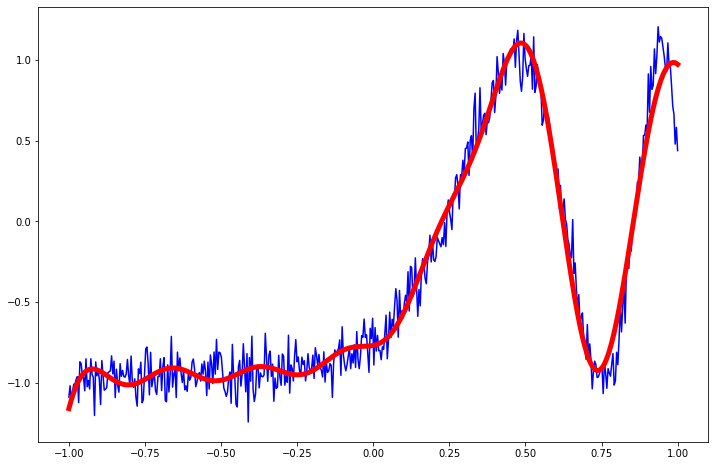

In [5]:
x = mgrid[-1:1:complex(0,500)].reshape(500, 1)

y = sin(3*(x+0.5)**3 - 1.2)
y += random.normal(0, 0.1, y.shape)

# rbf regression
rbf = RBF(1, 15, 1)
rbf.train(x, y)
z = rbf.test(x)

# plot original data and learned model
pyplot.figure(figsize=(12, 8));
pyplot.plot(x, y, 'b-');
pyplot.plot(x, z, 'r-', linewidth=5);